# gradient descent from scratch

In [368]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_regression

import matplotlib.pyplot as plt

In [369]:
X, y = make_regression(n_samples=4, n_features=1, n_targets=1, n_informative=1, noise=80, random_state=5)

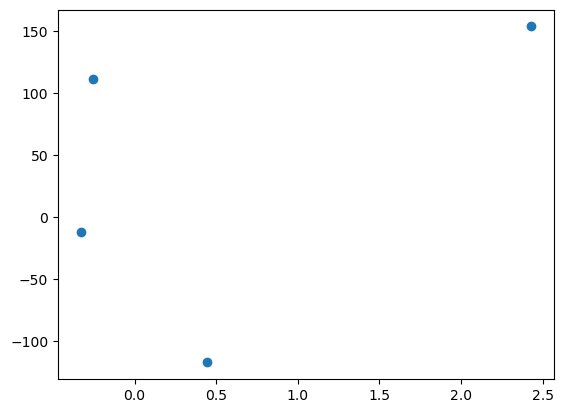

In [370]:
plt.scatter(X, y)
plt.show()

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr=LinearRegression()

In [45]:
lr.fit(X, y)

LinearRegression()

In [46]:
lr.coef_

array([62.76788679])

In [47]:
lr.intercept_

25.643724394872326

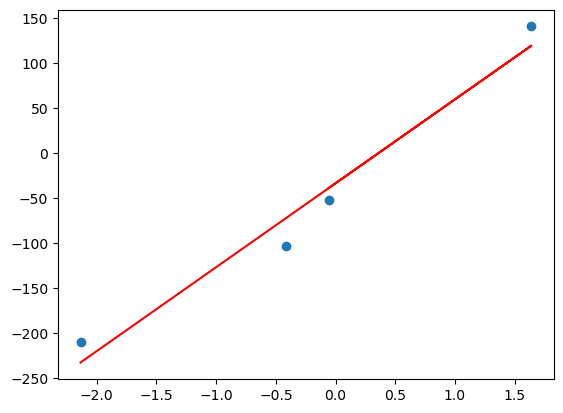

In [9]:
plt.plot(X, lr.predict(X), color="red")
plt.scatter(X, y)
plt.show()

In [10]:
y_pred=((93.15*X)+0).reshape(4)

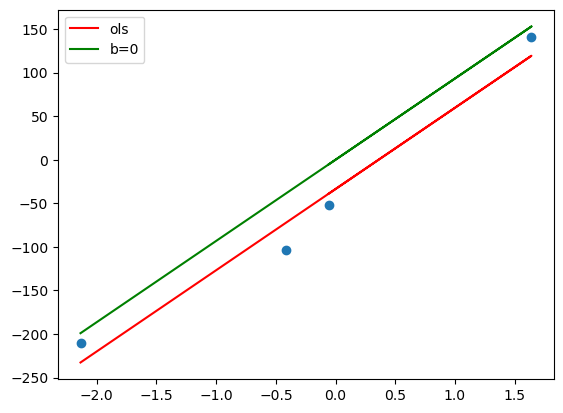

In [11]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color="red", label="ols")
plt.plot(X, y_pred, color="green", label="b=0")

plt.legend()
plt.show()

In [12]:
m=93.15
b=0

In [13]:
loss_slope=-2*np.sum(m*X.ravel()+b)
loss_slope

180.51537790108802

In [14]:
learning_rate=0.1

step_size=learning_rate*loss_slope
step_size

18.051537790108803

In [15]:
b=b-step_size
b

-18.051537790108803

In [16]:
y_pred1=(m*X+b).reshape(4)

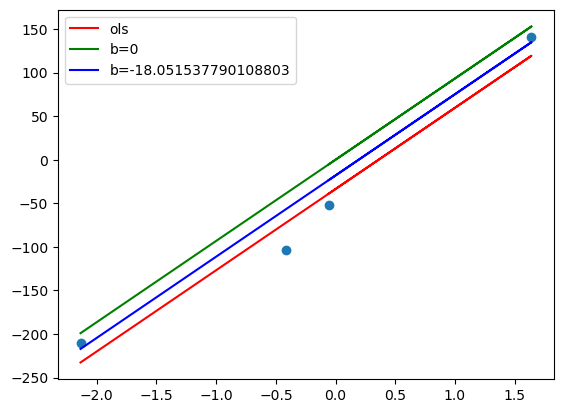

In [17]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color="red", label="ols")
plt.plot(X, y_pred, color="green", label="b=0")
plt.plot(X, y_pred1, color="blue", label="b={}".format(b))

plt.legend()
plt.show()

In [18]:
m=93.15
b=-18.05

In [19]:
loss_slope=-2*np.sum(m*X.ravel()+b)
loss_slope

324.91537790108805

In [20]:
learning_rate=0.1

step_size=learning_rate*loss_slope
step_size

32.49153779010881

In [21]:
b=b-step_size
b

-50.541537790108805

In [22]:
y_pred2=(m*X+b).reshape(4)

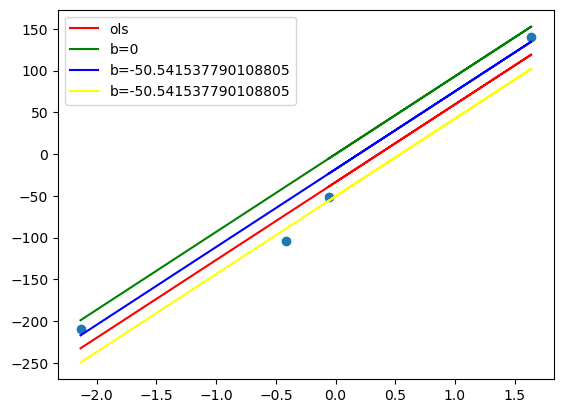

In [23]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color="red", label="ols")
plt.plot(X, y_pred, color="green", label="b=0")
plt.plot(X, y_pred1, color="blue", label="b={}".format(b))
plt.plot(X, y_pred2, color="yellow", label="b={}".format(b))


plt.legend()
plt.show()

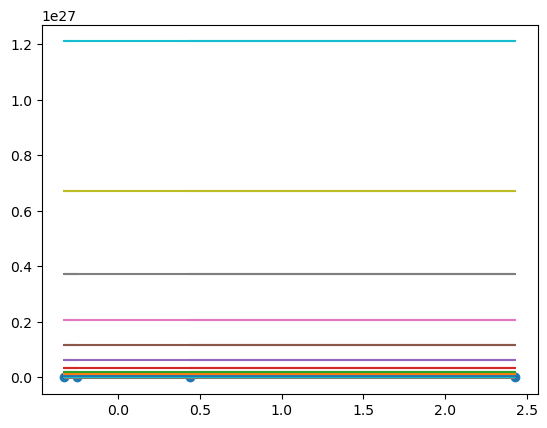

In [63]:
b=0
m=62.76788679
learning_rate=0.1

epochs=100

for i in range(epochs):
    
    loss_slope=-2*np.sum(m*X.ravel()+b)
    b=b-(learning_rate*loss_slope)
    
    y_pred=m*X+b
    
    plt.plot(X, y_pred)
    
plt.scatter(X, y)  

In [67]:
X, y = make_regression(n_samples=100, n_features=1, n_targets=1, n_informative=1, noise=40, random_state=5)

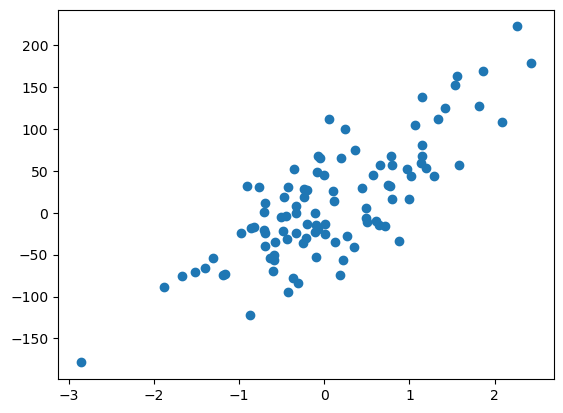

In [68]:
plt.scatter(X, y)

In [70]:
lr=LinearRegression()

In [71]:
lr.fit(X, y)

LinearRegression()

In [72]:
print(lr.coef_)
print(lr.intercept_)

[58.78579773]
6.546805691606675


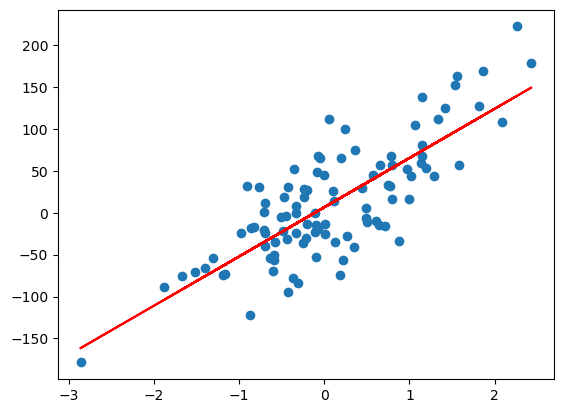

In [109]:
plt.scatter(X, y)
plt.plot(X, lr.coef_*X+lr.intercept_, color="red")

In [75]:
m=58.78579773
b=-120

In [105]:
class GDRegressor:
    
    def __init__(self, learning_rate, epochs):
        self.m=m
        self.b=b
        self.lr=learning_rate
        self.epochs=epochs
        
    def fit(self, X, y):
        for i in range(self.epochs):
            loss_slope=-2*np.sum(y-self.m*X.ravel()-self.b)
            self.b=self.b-(self.lr*loss_slope)
            print(loss_slope, self.b)
        return self.b

In [118]:
gd=GDRegressor(0.01, 10)

In [119]:
gd.fit(X, y)

-25309.361138350374 133.09361138350374
25309.36113835038 -120.00000000000009
-25309.36113835039 133.0936113835038
25309.36113835039 -120.00000000000009
-25309.36113835039 133.0936113835038
25309.36113835039 -120.00000000000009
-25309.36113835039 133.0936113835038
25309.36113835039 -120.00000000000009
-25309.36113835039 133.0936113835038
25309.36113835039 -120.00000000000009


-120.00000000000009

In [127]:
X, y = make_regression(n_samples=100, n_features=1, n_targets=1, n_informative=1, noise=50, random_state=2)

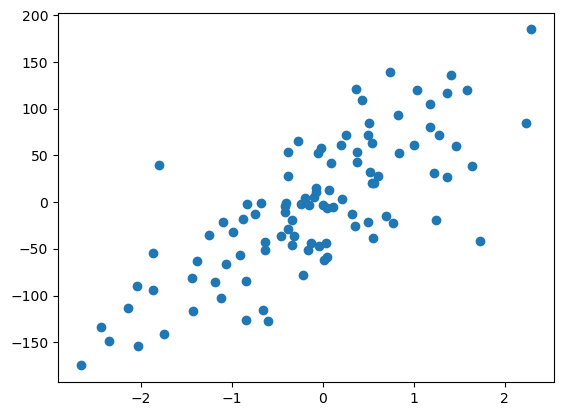

In [128]:
plt.scatter(X, y)

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

In [180]:
lr=LinearRegression()

In [181]:
lr.fit(X_train, y_train)

LinearRegression()

In [182]:
print(lr.coef_)
print(lr.intercept_)

[56.98099145]
-1.197320245196579


In [185]:
y_pred=lr.predict(X_test)

In [183]:
from sklearn.metrics import r2_score

In [186]:
r2_score(y_test, y_pred)

0.21045905431305623

In [133]:
from sklearn.model_selection import cross_val_score

In [136]:
np.mean(cross_val_score(lr, X, y, scoring="r2", cv=10))

0.4603853787376952

In [171]:
class GDRegressor:
    
    def __init__(self, learning_rate, epochs):
        self.m=100
        self.b=-120
        self.lr=learning_rate
        self.epochs=epochs
        
    def fit(self, X, y):
        for i in range(self.epochs):
            loss_slope_b=-2*np.sum(y-self.m*X.ravel()-self.b)
            loss_slope_m=-2*np.sum((y-self.m*X.ravel()-self.b)*X.ravel())
            
            self.b=self.b-(self.lr*loss_slope_b)
            self.m=self.m-(self.lr*loss_slope_m)
            
        print(self.m, self.b)
        
    def predict(self, X):
        return self.m*X+self.b

In [172]:
gd=GDRegressor(0.001, 100)

In [188]:
gd.fit(X_train, y_train)

56.980991485210644 -1.1973201828993456


In [191]:
y_pred=gd.predict(X_test)
r2_score(y_test, y_pred)

0.21045905449855873

# Batch gradient descent

In [371]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_diabetes

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import time

import random

In [372]:
X, y=load_diabetes(return_X_y=True)

In [373]:
X.shape, y.shape

((442, 10), (442,))

In [374]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
lr.coef_, lr.intercept_

(array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
        -931.48884588,  518.06227698,  163.41998299,  275.31790158,
         736.1988589 ,   48.67065743]),
 151.34560453985995)

In [20]:
y_pred=lr.predict(X_test)

In [22]:
r2_score(y_test, y_pred)

0.4526027629719195

In [333]:
class NGDRegressor:
    
    def __init__(self, learning_rate=0.01, epochs=100):
        
        self.coef_=None
        self.intercept_=None
        self.lr=learning_rate
        self.epochs=epochs
        
    def fit(self, X_train, y_train):
        
        self.intercept_=0
        self.coef_=np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            
            y_hat=np.dot(X_train, self.coef_)+self.intercept_
            intercept_der=-2*np.mean(y_train-y_hat)
            self.intercept_=self.intercept_-(self.lr*intercept_der)
            
            coef_der=(-2*np.dot((y_train-y_hat), X_train))/X_train.shape[0]
            self.coef_=self.coef_-(self.lr*coef_der)
        print("intercept",self.intercept_)
        print("coef",self.coef_)
        
    
    def predict(self, X_test):
        
         return np.dot(X_test, self.coef_)+self.intercept_

In [334]:
ngdr=NGDRegressor(epochs=10000, learning_rate=0.1)

In [335]:
start=time.time()
ngdr.fit(X_train, y_train)
print(time.time()-start)

intercept 151.30378700370363
coef [  39.93575688 -236.68387765  550.34481869  340.32530077  -98.33860594
 -127.00138958 -215.58025351  149.13672352  411.1213286    71.82177261]
0.15819454193115234


In [265]:
y_pred=ngdr.predict(X_test)

In [266]:
r2_score(y_test, y_pred)

0.45636750887262745

# Stochastic gradient descent

In [355]:
class SGDRegressor:
    
    def __init__(self, learning_rate=0.01, epochs=100):
        
        self.coef_=None
        self.intercept_=None
        self.lr=learning_rate
        self.epochs=epochs
        
    def fit(self, X_train, y_train):
        
        self.intercept_=0
        self.coef_=np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            for j in range(X_train.shape[1]):
                idx=np.random.randint(0, X_train.shape[0])
            
                y_hat=np.dot(X_train[idx], self.coef_)+self.intercept_
            
                intercept_der=-2*(y_train[idx]-y_hat)
                self.intercept_=self.intercept_-(self.lr*intercept_der)
            
                coef_der=-2*np.dot((y_train[idx]-y_hat), X_train[idx])
                self.coef_=self.coef_-(self.lr*coef_der)
            
        print("intercept",self.intercept_)
        print("coef",self.coef_)
        
    
    def predict(self, X_test):
        
         return np.dot(X_test, self.coef_)+self.intercept_

In [356]:
sgdr=SGDRegressor(epochs=10000, learning_rate=0.01)

In [357]:
start=time.time()
sgdr.fit(X_train, y_train)
print(time.time()-start)

intercept 152.35434112092753
coef [  41.55969139 -233.38871056  564.28929623  346.86376908 -104.44455256
 -135.14267493 -219.90020066  155.06437795  411.84879993   67.01245639]
0.9767844676971436


In [358]:
y_pred=sgdr.predict(X_test)

In [359]:
r2_score(y_test, y_pred)

0.45322441873236163

# Mini batch gradient descent

In [381]:
class MBGDRegressor:
    
    def __init__(self, batch_size, learning_rate=0.01, epochs=100):
        
        self.coef_=None
        self.intercept_=None
        self.lr=learning_rate
        self.epochs=epochs
        self.batch_size=batch_size
        
    def fit(self, X_train, y_train):
        
        self.intercept_=0
        self.coef_=np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            for j in range(int(X_train.shape[0]/self.batch_size)):
                idx=random.sample(range(X_train.shape[0]), self.batch_size)
            
                y_hat=np.dot(X_train[idx], self.coef_)+self.intercept_
            
                intercept_der=-2*np.mean(y_train[idx]-y_hat)
                self.intercept_=self.intercept_-(self.lr*intercept_der)
            
                coef_der=-2*np.dot((y_train[idx]-y_hat), X_train[idx])
                self.coef_=self.coef_-(self.lr*coef_der)
            
        print("intercept",self.intercept_)
        print("coef",self.coef_)
        
    
    def predict(self, X_test):
        
         return np.dot(X_test, self.coef_)+self.intercept_

In [423]:
mbgdr=MBGDRegressor(batch_size=int(X_train.shape[0]/10), learning_rate=0.1, epochs=90)

In [424]:
mbgdr.fit(X_train, y_train)

intercept 151.84579029270478
coef [  50.49693807 -259.43109883  565.14551599  343.80217688 -175.05466257
  -77.48803393 -184.19191463  188.58368186  442.72243868   54.51398104]


In [425]:
y_pred=mbgdr.predict(X_test)

In [426]:
r2_score(y_test, y_pred)

0.4527885574914451

In [427]:
from sklearn.linear_model import SGDRegressor

In [431]:
sgdr=SGDRegressor(learning_rate="constant", eta0=0.2)

In [439]:
batch_size=100

for i in range(100):
    
    idx=random.sample(range(X_train.shape[0]), batch_size)
    sgdr.partial_fit(X_train[idx], y_train[idx])

In [443]:
sdgr.coef_, sdgr.intercept_

(array([  42.97354359, -241.26197729,  556.19023653,  338.74746452,
         -96.57320059, -128.94199495, -218.84499817,  148.54927873,
         412.56632458,   59.45327316]),
 152.18844677018086)